## A comprehensive stats question

### Mean and Variance
Given a data set $x = \{x_1, x_2,...,x_N\}$, write a formula for the mean.

$$E[X]=\frac{1}{N} \sum_{i=1}^{N} x_i$$

Write the formula for the variance

$$VAR(X) = E[X^2] - E[X]^2=\frac{1}{N} \sum_{i=1}^N x_i^2 - \left(\frac{1}{N} \sum_{i=1}^{N} x_i\right)^2$$

### Covariance
Given a second dataset $x = \{y_1, y_2,...,y_N\}$ write a formula for the covariance of x and y

_I don't think it matters that they have the formula exact or can remember if it off the top of their head, it's more important to see if they can reason through the general idea of covariance_

Covariance should measure the tendency of the corresponding data points in x and y to be above or below their mean at the same time. So, perhaps that would be

$$COV(X, Y) = E[(X-\mu_X)(Y - \mu_Y)]$$

Now, if X and Y were completely independent, then we'd expect that the multiplying the data points in the two data sets together would simply yield the product of their means. However, if the two data sets vary together, we'd expect that it would be some number higher than that (since the errors in X and Y would not average out). That might look like:

$$COV(X, Y) = E[XY] - E[X]E[Y] = \frac{1}{N}\sum_{i=1}^N x_iy_i - \frac{1}{N^2}\sum_{i=1}^N x_i \sum_{i=1}^N y_i$$

_Both of these answers are exactly correct but use slightly different reasonings to get there_

### R-squared
The problem with using covariance is that the magnitude of the number doesn't tell us much on the surface. Can you think of a more appropriate (perhaps related) metric to measure the correlation between two data sets?

_Should be able to come up with the fact that the covariance should be normalized by the natural variance in the datasets. Don't think it's important to generate the exact formula for the r-squared._

Normalize the covariance by the variances of the data sets.

$$R^2=\frac{COV(X, Y)^2}{VAR(X) \cdot VAR(Y)}$$

Given the histogram below, can you write a formula for computing the mean and variance?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jeromenilmeier/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


([<matplotlib.axis.XTick at 0x10605d110>,
 <a list of 6 Text xticklabel objects>)

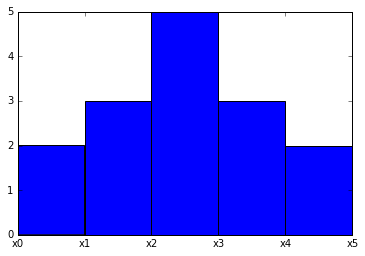

In [2]:
plt.hist(np.array([0,1,3,3,3,5,5,5,5,5,7,7,7,9,10]), bins=5)
plt.xticks([0, 2, 4, 6, 8, 10], ['x'+str(i) for i in xrange(6)])

$$E[X]=\frac{1}{N} \sum_{i=0}^{N-1} f_i \frac{x_i + x_{i+1}}{2}\\
E[X^2] = \frac{1}{N} \sum_{i=0}^{N-1} f_i \frac{x_i^2 + x_{i+1}^2}{2}\\
VAR(X) = E[X^2] - E[X]^2$$

### Code it

Write some code that can compute the histogram of a data set. The input should be a list of floats and a number of bins and the output should be a list of tuples [((bin_start, bin_end), frequency)].

e.g. x = [0,1,1,4,4,6], nbins = 3 => [((0,2), 3), ((2,4), 2), ((4, 6), 1)]

In [7]:
def compute_bins(data, num_bins):
    start = min(data)
    stop = max(data)
    interval = (stop - start) / float(num_bins)
    return [(start + i*interval, start + (1 + i)*interval) for i in xrange(num_bins)]
    

In [8]:
from collections import defaultdict
def bin_data(data, bins):
    # sorting makes solution O(N log N) (data length = N)
    # No sorting makes solution O(N*k) (data length = N, num_bins = k)
    srtd_data = sorted(data)
    bin_idx = 0
    d = defaultdict(int)
    for sample in srtd_data:
        while sample > bins[bin_idx][1]:
            if bins[bin_idx] not in d:
                d[bins[bin_idx]] = 0
            bin_idx += 1
        d[bins[bin_idx]] += 1
    return [(key, val) for key, val in d.iteritems()]

Now, write functions to compute mean and variance from the histogram

In [9]:
def mean(binned_data):
    mean_sum = 0
    N = 0
    for b, cnt in binned_data:
        N += cnt
        mean_sum += (b[0] + b[1]) / 2. * cnt
    return mean_sum / float(N)
def variance(binned_data):
    Ex2 = mean([((b[0]**2, b[1]**2), cnt) for b, cnt in binned_data])
    Ex = mean(binned_data)
    return Ex2 - Ex**2

In [10]:
import random
some_data = [random.randint(0, 10) for i in xrange(1000)]
num_bins = 10000
binned_data = bin_data(some_data, compute_bins(some_data, num_bins))
print variance(binned_data)
print np.var(some_data)
print mean(binned_data)
print np.mean(some_data)

9.94329475367
9.944044
5.133573
5.134


Now, write the pseudo code for making a histogram using map reduce

```
data.map(lambda x: (mapbin(x, bins), 1)).reduceByKey(lambda a, b: a + b)
```

### Least Squares Fun

**Interviewer**  
What function is minimized for a simple least squares regression?

**Answer**
$$||X\beta - y||_2^2$$

**Interviewer**  
What would it look like if you just used a constant to approximate y?

**Answer**
$$||c - y||_2^2 = \sum_{i=0}^{N-1} (c-y_i)^2$$

**Interviewer**  
What would c be?

**Answer**
Answer: The mean of the output data

**Interviewer**  
Can you prove it?

**Answer**
$$\min_c \sum_{i=1}^N (c - y_i)^2\\
\min_c \sum_{i=1}^N y_i^2 - 2y_ic + c^2\\
-2\sum_{i=1}^N y_i + 2\sum_{i=1}^N c=0\\
\sum_{i=1}^N c = \sum_{i=1}^N y_i\\
Nc = \sum_{i=1}^N y_i\\
c = \frac{\sum_{i=1}^N y_i}{N}
$$

Now, what if we used a piecewise constant function to estimate y? Meaning,

$$\hat{y} = \begin{cases}c_1,  i \in [0, k], \\ c_2, i \in [k+1, N]\end{cases}$$

Answer: 

$$c_1 = \frac{1}{k} \sum_{i=1}^{k} y_i\\
c_2 = \frac{1}{N-k} \sum_{i=k+1}^{N} y_i$$

What would the error be?

$$\sum_{i=1}^{k} (c_1-y_i)^2 + \sum_{i=k+1}^{N} (c_2-y_i)^2$$

Write a program that computes c1 and c2 for a give data set and a given value of k and also computes the error.

In [13]:
# Naive solution
data = [random.randint(0, 9) for i in xrange(4)]
def compute_error(data, k):
    c1 = sum(data[:k]) / float(k)
    c2 = sum(data[k:]) / float(len(data) - k)
    e1 = sum([(c1 - y)**2 for y in data[:k]])
    e2 = sum([(c2 - y)**2 for y in data[k:]])
    return e1, e2

Now do it using a single for loop

Answer: The key to this is to expand the summation. Consider the case where a single constant is used.

$$error = \sum (c - y_i)^2\\
error = \sum c^2 - 2cy_i +y_i^2\\
error = \sum c^2 - 2c\sum y_i + \sum y_i^2\\
error = Nc^2 - 2c\sum y_i + \sum y_i^2
$$
c is easily computed after looping through the data (the average). The middle summation can be computed after the for loop as $(-2c)(\sum y_i)$. The final summation can be computed by accumulation through the for loop. Basically, just keep track of two accumulators through the for loop (sum_y and sum_y2). Everything else can be computed after the for loop using simple math operations.

In [14]:
def compute_error_optimized(data, k):
    y = [0, 0]
    y2 = [0, 0]
    for i, num in enumerate(data):
        # use separate accumulators for the two piecewise regions
        if i > k - 1:
            y2[1] += num*num
            y[1] += num
        else:
            y2[0] += num*num
            y[0] += num
    N = i + 1
    c1 = y[0] / float(k)
    e1 = y2[0] - 2*c1*y[0] + c1**2*(k)

    c2 = y[1] / float(N - k)
    e2 = y2[1] - 2*c2*y[1] + c2**2*(N - k)

    return e1, e2

In [15]:
print compute_error(data, 2)
print compute_error_optimized(data,2)

(18.0, 4.5)
(18.0, 4.5)


In [16]:
data

[9, 3, 9, 6]

In [17]:
np.var(data)

6.1875

In [18]:
data = np.array(data)
np.sum(data*data / float(data.shape[0])) - np.mean(data)**2

6.1875